In [1]:
import cv2 
from matplotlib import pyplot as plt

In [2]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import numpy as np
import random
import os
import csv
import cv2
from frame import FLCDataset, visualize_transformed_image

import torch
import torch.nn as nn
import torch.nn.functional as F


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "CPU")
print(device)
torch.cuda.empty_cache()

cuda:0


In [4]:
train_0_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_0_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_1_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_1_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_2_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_2_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_3_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_3_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_4_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_4_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
train_5_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_5_train.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")

train_0_loader = DataLoader(train_0_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_1_loader = DataLoader(train_1_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_2_loader = DataLoader(train_2_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_3_loader = DataLoader(train_3_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_4_loader = DataLoader(train_4_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
train_5_loader = DataLoader(train_5_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)

val_0_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_0_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_1_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_1_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_2_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_2_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_3_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_3_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_4_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_4_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
val_5_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_5_val.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")

val_0_loader = DataLoader(val_0_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_1_loader = DataLoader(val_1_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_2_loader = DataLoader(val_2_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_3_loader = DataLoader(val_3_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_4_loader = DataLoader(val_4_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
val_5_loader = DataLoader(val_5_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)

test_0_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_0_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
test_1_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_1_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
test_2_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_2_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
test_3_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_3_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
test_4_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_4_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")
test_5_ds = FLCDataset(r"C:\Users\lucyc\Desktop\face_loc_dataset\ds_5_test.csv", r"C:\Users\lucyc\Desktop\face_loc_dataset\imgs")

test_0_loader = DataLoader(test_0_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_1_loader = DataLoader(test_1_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_2_loader = DataLoader(test_2_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_3_loader = DataLoader(test_3_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_4_loader = DataLoader(test_4_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)
test_5_loader = DataLoader(test_5_ds, batch_size=25, shuffle=True, num_workers=3, persistent_workers=True)

def get_iters():
    train_iters = [iter(train_0_loader), iter(train_1_loader), iter(train_2_loader), iter(train_3_loader), iter(train_4_loader), iter(train_5_loader)]
    val_iters = [iter(val_0_loader), iter(val_1_loader), iter(val_2_loader), iter(val_3_loader), iter(val_4_loader), iter(val_5_loader)]
    return train_iters, val_iters

def get_test_iters():
    test_iters = [iter(test_0_loader), iter(test_1_loader), iter(test_2_loader), iter(test_3_loader), iter(test_4_loader), iter(test_5_loader)]
    return test_iters

In [5]:
a, b, c = next(iter(train_0_loader))

In [6]:
a.shape

torch.Size([25, 3, 12, 12])

In [7]:
class PNet(nn.Module):
    def __init__(self):
        super(PNet, self).__init__()

        # Define network layers
        self.conv1 = nn.Conv2d(3, 10, 3)  # Input: 12x12x3, output: 10x10x10
        self.conv2 = nn.Conv2d(10, 16, 3) # Input: 5x5x10, output: 3x3x16
        self.conv3 = nn.Conv2d(16, 32, 3) # Input: 3x3x16, output: 1x1x32

        self.face_det = nn.Conv2d(32, 2, 1)  # face/not face classification
        self.bbox = nn.Conv2d(32, 4, 1)      # bounding box regression
        self.landmark = nn.Conv2d(32, 10, 1) # landmark localization

    def forward(self, x):
        # Forward pass
        x = F.relu(self.conv1(x))    # Activation following first convolution
        x = F.max_pool2d(x, 2)       # Max pooling (reducing spatial size to 5x5)
        x = F.relu(self.conv2(x))    # Activation following second convolution
        x = F.relu(self.conv3(x))    # Activation following third convolution

        # Applying convolution layers to the last feature map for different task
        facedet = self.face_det(x)   # Face detection
        bbox = self.bbox(x)          # Bounding box regression
        landmark = self.landmark(x)  # Landmark detection

        # Reshape the output tensors to remove extra dimensions
        facedet = facedet.view(facedet.size(0), -1)  # Reshape to (N, 2)
        bbox = bbox.view(bbox.size(0), -1)           # Reshape to (N, 4)
        landmark = landmark.view(landmark.size(0), -1)  # Reshape to (N, 10)

        return facedet, bbox, landmark




In [8]:
class PNetLoss(nn.Module):
    def __init__(self):
        super(PNetLoss, self).__init__()
        # 初始化可以在这里完成，如果有必要的话
        self.losscrs = nn.CrossEntropyLoss()

    def facedet_loss_positive(self, facedet):
        # 假设`facedet`是一个二分类的logits输出，且正样本的类索引是0
        face_label = torch.zeros(facedet.shape[0], dtype=torch.long, device=facedet.device)
        return self.losscrs(facedet, face_label)

    def facedet_loss_negative(self, facedet):
        # 假设`facedet`是一个二分类的logits输出，且负样本的类索引是1
        not_face_label = torch.ones(facedet.shape[0], dtype=torch.long, device=facedet.device)
        return self.losscrs(facedet, not_face_label)

    def bbox_loss(self, bbox, label):
        return F.mse_loss(bbox, label)
    
    def landmark_loss(self, landmark, label):
        return F.mse_loss(landmark, label)

    def forward(self, facedet, bbox, landmark, labels, labels_type):

        if labels_type in ["2", "3", "4"]:
            loss = self.facedet_loss_negative(facedet)
            return loss.mean()

        elif labels_type in ["1", "0"]:
            loss = self.facedet_loss_positive(facedet) + 0.5*self.bbox_loss(bbox, labels)
            return loss.mean()

        elif labels_type == "5":
            loss = self.facedet_loss_positive(facedet) + 0.5*self.landmark_loss(landmark, labels)
            return loss.mean()



In [9]:
torch.cuda.empty_cache()
torch.autograd.set_detect_anomaly(True)

model = PNet()
print(model)

model.to(device)  # 将模型发送到GPU，如果有的话

# 定义损失函数和优化器
criterion = PNetLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


PNet(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (face_det): Conv2d(32, 2, kernel_size=(1, 1), stride=(1, 1))
  (bbox): Conv2d(32, 4, kernel_size=(1, 1), stride=(1, 1))
  (landmark): Conv2d(32, 10, kernel_size=(1, 1), stride=(1, 1))
)


In [10]:
training_loss = []
validation_loss = []

def get_loss(model, criterion, device, train_iters):
    loss = 0
    for iter in train_iters:
        inputs = next(iter)
        img_tensor = inputs[0].to(device)
        label = inputs[1].to(device)
        ltypes = inputs[2][0]

        facedet, bbox, landmark = model(img_tensor)
        loss =  loss + criterion(facedet, bbox, landmark, label, ltypes)
    return loss

for i in range(60):
    model.train()  # 设置模型为训练模式

    train_loss_acc = 0.
    train_num = 0

    train_iters, val_iters = get_iters()

    for j in range(len(train_iters[0])):

        optimizer.zero_grad()  # 清除之前的梯度
        loss = get_loss(model, criterion, device, train_iters)
        # 反向传播和优化
        loss.backward()  # 反向传播计算当前的梯度

        optimizer.step()  # 更新参数

        train_loss_acc += loss.item()
        train_num += 1
        
        print(train_num, loss.item(), train_num*150, len(train_iters[0])*150, i)
    
    training_loss.append(train_loss_acc/train_num)

    model.eval()  # 设置模型为评估/测试模式

    val_loss_acc = 0
    val_num = 0
    with torch.no_grad():
        for j in range(len(val_iters[0])):
            .
            loss = get_loss(model, criterion, device, val_iters)
            val_loss_acc += loss.item()
            val_num += 1

            print(val_num, loss.item(), val_num*150, len(val_iters[0])*150, i)
    
    validation_loss.append(val_loss_acc/val_num)


1 84.55581665039062 150 208650 0
2 81.14331817626953 300 208650 0
3 84.66629028320312 450 208650 0
4 90.27812957763672 600 208650 0
5 82.72312927246094 750 208650 0
6 87.19595336914062 900 208650 0
7 86.41011810302734 1050 208650 0
8 83.91869354248047 1200 208650 0
9 82.42863464355469 1350 208650 0
10 83.55595397949219 1500 208650 0
11 86.17115783691406 1650 208650 0
12 83.83939361572266 1800 208650 0
13 82.87886047363281 1950 208650 0
14 84.8343505859375 2100 208650 0
15 82.16685485839844 2250 208650 0
16 83.271484375 2400 208650 0
17 86.32575225830078 2550 208650 0
18 82.80989837646484 2700 208650 0
19 83.4328384399414 2850 208650 0
20 88.07852172851562 3000 208650 0
21 80.56548309326172 3150 208650 0
22 81.54000854492188 3300 208650 0
23 86.57847595214844 3450 208650 0
24 83.45697021484375 3600 208650 0
25 83.52584075927734 3750 208650 0
26 83.42037963867188 3900 208650 0
27 84.68196868896484 4050 208650 0
28 81.46769714355469 4200 208650 0
29 88.4097671508789 4350 208650 0
30 85.48

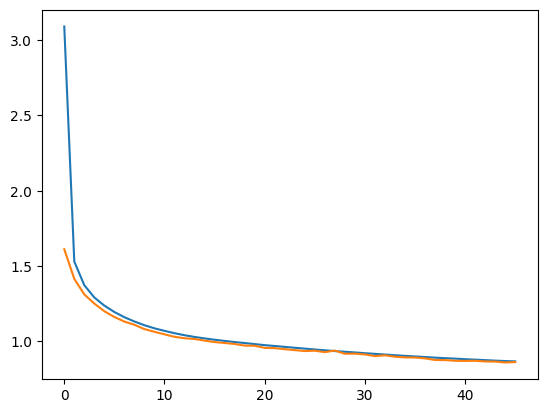

In [24]:
validation_loss
train_loss = [sum(x[1])/len(x[1]) for x in training_loss]
plt.plot(train_loss)
plt.plot(validation_loss)
plt.show()


In [29]:
# 保存模型
torch.save(model, 'face_loc_r_nn.pth')

In [125]:
# load model
model_trained = torch.load('face_loc_r_48.pth')
model_trained.eval()  # 设置模型为评估/测试模式


RNet(
  (conv1): Conv2d(3, 28, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(28, 48, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(48, 64, kernel_size=(2, 2), stride=(1, 1))
  (linear1): Linear(in_features=576, out_features=128, bias=True)
  (face_det): Linear(in_features=128, out_features=2, bias=True)
  (bbox): Linear(in_features=128, out_features=4, bias=True)
  (landmark): Linear(in_features=128, out_features=10, bias=True)
)

In [126]:
aa = iter(test_loader)

In [133]:

a, b, c = next(aa)

In [134]:
def get_argsn(b):
    return [int(float(x)//1) for x in b]

def is_face(i):
    if i == "0":
        return "face"
    if i == "1":
        return "face"
    if i == "2":
        return "not face"
    if i == "3":
        return "not face"
    if i == "4":
        return "not face"
    if i == "5":
        return "face"

In [135]:
right = 0
total = 0
for i in range(128):

    #visualize_transformed_image(a[i],get_argsn(b[i]),get_argsn(b[i]))
    #print(is_face(c[i]))

    with torch.no_grad():
        face_det, bbox, landmark = model_trained(a[i].to(device))
    probabilities = torch.nn.functional.softmax(face_det, dim=1)
    # print(bbox)
    # print(landmark)
    print(probabilities)

    # if probabilities[0][0] > probabilities[0][1]:
    #     print("face")
    #     visualize_transformed_image(a[i],get_argsn(bbox[0]),get_argsn(landmark[0]))   
    # else:
    #     print("not face")
    #     visualize_transformed_image(a[i],[0,0,0,0],None)
    if probabilities[0][0] > 0.8 and is_face(c[i]) == "face":
        right += 1
    if probabilities[0][0] <= 0.2 and is_face(c[i]) == "not face":
        right += 1

    total += 1

print("total: {}".format(total))
print("right: {}".format(right))
print("accuracy: {}".format(right/128))

tensor([[0.2195, 0.7805]], device='cuda:0')
tensor([[0.0763, 0.9237]], device='cuda:0')
tensor([[0.9904, 0.0096]], device='cuda:0')
tensor([[0.9565, 0.0435]], device='cuda:0')
tensor([[0.1128, 0.8872]], device='cuda:0')
tensor([[0.9132, 0.0868]], device='cuda:0')
tensor([[0.0495, 0.9505]], device='cuda:0')
tensor([[0.9941, 0.0059]], device='cuda:0')
tensor([[0.9540, 0.0460]], device='cuda:0')
tensor([[0.0084, 0.9916]], device='cuda:0')
tensor([[0.9477, 0.0523]], device='cuda:0')
tensor([[0.5705, 0.4295]], device='cuda:0')
tensor([[0.0867, 0.9133]], device='cuda:0')
tensor([[0.0132, 0.9868]], device='cuda:0')
tensor([[0.0058, 0.9942]], device='cuda:0')
tensor([[0.9909, 0.0091]], device='cuda:0')
tensor([[0.0097, 0.9903]], device='cuda:0')
tensor([[9.9956e-01, 4.4021e-04]], device='cuda:0')
tensor([[0.0084, 0.9916]], device='cuda:0')
tensor([[0.0187, 0.9813]], device='cuda:0')
tensor([[0.9603, 0.0397]], device='cuda:0')
tensor([[0.9953, 0.0047]], device='cuda:0')
tensor([[0.1848, 0.8152]